# <h2 style="color:darkgreen; text-align: center; font-size: 30px">  🍐 Armut Association Rule Based Recommender System 🍐
</h2>

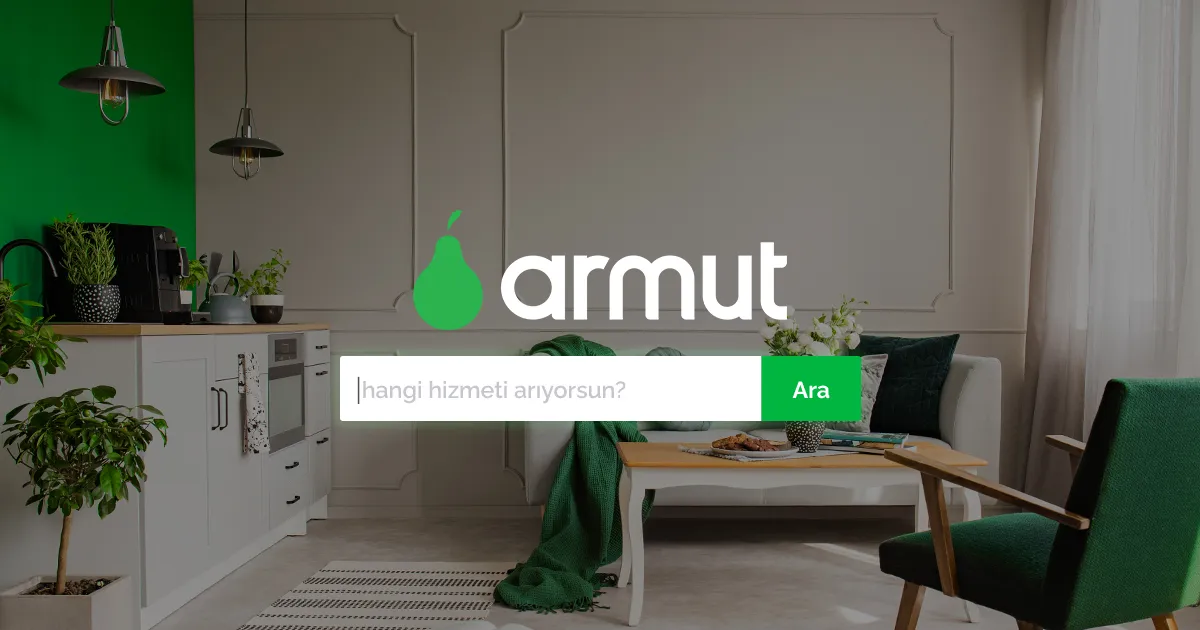

  <h2 style="color:darkgreen; text-align: left; font-size: 15px" > 👉 Business Problem ; 
</h2>

<h2 style="color:maroon; text-align: left; font-size: 15px" >  Armut, Turkey's largest online service platform, brings service providers and those who want to receive service together. It is desired to create a product recommendation system with Association Rule Learning by using the data set containing the service area users and the services and categories these users have received. 
</h2>

<h2 style="color:darkgreen; text-align: left; font-size: 15px" > 👉 Information about the dataset ;
</h2>

<h2 style="color:maroon; text-align: left; font-size: 15px" >  UserId; Customer Number
</h2>
<h2 style="color:maroon; text-align: left; font-size: 15px" > ServiceId; They are anonymized services for each category.
</h2>
<h2 style="color:maroon; text-align: left; font-size: 15px" > CategoryId; They are anonymized categories.
</h2>
<h2 style="color:maroon; text-align: left; font-size: 15px" > CreateDate; The date the service was purchased
</h2>

<h2 style="color:darkgreen; text-align: left; font-size: 15px" > 👉 Data Preprocessing 
</h2>

In [228]:
#!pip install mlxtend
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

In [229]:
df_ = pd.read_csv("armut_data.csv")

In [230]:
df = df_.copy()

In [231]:
def data_review(dataframe):
    print("**********head**********")
    print(dataframe.head())
    print("**********isna**********")
    print(dataframe.isnull().sum())
    print("**********shape*********")
    print(dataframe.shape)
    print("*********info***********")
    print(dataframe.info())
    print("*********describe*******")
    print(dataframe.describe().T)

In [232]:
data_review(df)

**********head**********
   UserId  ServiceId  CategoryId           CreateDate
0   25446          4           5  2017-08-06 16:11:00
1   22948         48           5  2017-08-06 16:12:00
2   10618          0           8  2017-08-06 16:13:00
3    7256          9           4  2017-08-06 16:14:00
4   25446         48           5  2017-08-06 16:16:00
**********isna**********
UserId        0
ServiceId     0
CategoryId    0
CreateDate    0
dtype: int64
**********shape*********
(162523, 4)
*********info***********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162523 entries, 0 to 162522
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   UserId      162523 non-null  int64 
 1   ServiceId   162523 non-null  int64 
 2   CategoryId  162523 non-null  int64 
 3   CreateDate  162523 non-null  object
dtypes: int64(3), object(1)
memory usage: 5.0+ MB
None
*********describe*******
               count          mean          std  mi

In [233]:
df['CreateDate'] = pd.to_datetime(df['CreateDate'])
df['New_Date'] = df['CreateDate'].dt.strftime('%Y-%m')

In [234]:
df['Service'] = [str(row[1]) + "_" + str(row[2])  for row in
                                   df.values]

df.head()

,UserId,ServiceId,CategoryId,CreateDate,New_Date,Service
0,25446,4,5,2017-08-06 16:11:00,2017-08,4_5
1,22948,48,5,2017-08-06 16:12:00,2017-08,48_5
2,10618,0,8,2017-08-06 16:13:00,2017-08,0_8
3,7256,9,4,2017-08-06 16:14:00,2017-08,9_4
4,25446,48,5,2017-08-06 16:16:00,2017-08,48_5


In [235]:
df['Service'] = df[['ServiceId','CategoryId']].apply(lambda x: '_'.join(x.astype(str)), axis=1)
df['BasketId'] = df[['UserId','New_Date']].apply(lambda x: '_'.join(x.astype(str)), axis=1)

In [236]:
df[df["Service"] ==  "2_0"].head()

,UserId,ServiceId,CategoryId,CreateDate,New_Date,Service,BasketId
102,21857,2,0,2017-08-07 00:53:00,2017-08,2_0,21857_2017-08
117,6981,2,0,2017-08-07 02:32:00,2017-08,2_0,6981_2017-08
137,6221,2,0,2017-08-07 04:16:00,2017-08,2_0,6221_2017-08
161,21608,2,0,2017-08-07 05:14:00,2017-08,2_0,21608_2017-08
177,23488,2,0,2017-08-07 05:53:00,2017-08,2_0,23488_2017-08


In [237]:
df.head()

,UserId,ServiceId,CategoryId,CreateDate,New_Date,Service,BasketId
0,25446,4,5,2017-08-06 16:11:00,2017-08,4_5,25446_2017-08
1,22948,48,5,2017-08-06 16:12:00,2017-08,48_5,22948_2017-08
2,10618,0,8,2017-08-06 16:13:00,2017-08,0_8,10618_2017-08
3,7256,9,4,2017-08-06 16:14:00,2017-08,9_4,7256_2017-08
4,25446,48,5,2017-08-06 16:16:00,2017-08,48_5,25446_2017-08


<h2 style="color:darkgreen; text-align: left; font-size: 15px" > 👉 Preparing ARL Data Structures ;
</h2>

In [238]:
df_ready=df.groupby(["BasketId","Service"]).agg({"CategoryId":"sum"}).unstack().fillna(0). \
    applymap(lambda x:1 if x>0 else 0)

In [239]:
df_ready.head()

CategoryId                                                 ...  \
Service              0_8 10_9 11_11 12_7 13_11 14_7 15_1 16_8 17_5 18_4  ...   
BasketId                                                                 ...   
0_2017-08              0    0     0    0     0    0    0    0    0    0  ...   
0_2017-09              0    0     0    0     0    0    0    0    0    0  ...   
0_2018-01              0    0     0    0     0    0    0    0    0    0  ...   
0_2018-04              0    0     0    0     0    1    0    0    0    0  ...   
10000_2017-08          0    0     0    0     0    0    0    0    0    0  ...   

                                                            
Service       46_4 47_7 48_5 49_1 4_5 5_11 6_7 7_3 8_5 9_4  
BasketId                                                    
0_2017-08        1    0    1    0   0    0   0   0   0   0  
0_2017-09        0    0    1    0   1    0   0   0   0   0  
0_2018-01        0    0    0    0   0    0   0   1   0   0  
0_2018-04        0    0    0    0   0    0   0   0   0   0  
10000_2017-08    1    0    0    0   0    0   0   0   0   0  

[5 rows x 50 columns]

In [240]:
df_ready.head().style.background_gradient(axis=0, cmap='PuBu')

<h2 style="color:darkgreen; text-align: left; font-size: 15px" > 👉 Association Rules Analysis ;
</h2>

In [241]:
apr_re = df.groupby(['BasketId', 'Service'])["CategoryId"].count().unstack().fillna(0).applymap(lambda x: 1 if  x>0 else 0)

In [242]:
frequent_itemsets = apriori(apr_re,min_support=0.01, use_colnames=True, low_memory=True )

C:\Users\lenovo\Anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:115: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


In [243]:
frequent_itemsets.sort_values("support", ascending=False).head(5)

,support,itemsets
8,0.238121,(18_4)
19,0.130286,(2_0)
5,0.120963,(15_1)
39,0.067762,(49_1)
28,0.066568,(38_4)


In [244]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.01)
# important; 

In [245]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(13_11),(2_0),0.056627,0.130286,0.012819,0.226382,1.737574,0.005442,1.124216
1,(2_0),(13_11),0.130286,0.056627,0.012819,0.098394,1.737574,0.005442,1.046325
2,(2_0),(15_1),0.130286,0.120963,0.033951,0.260588,2.154278,0.018191,1.188833
3,(15_1),(2_0),0.120963,0.130286,0.033951,0.280673,2.154278,0.018191,1.209066
4,(15_1),(33_4),0.120963,0.027310,0.011233,0.092861,3.400299,0.007929,1.072262


In [246]:
def arl_recommender(rules_df, Service, rec_count=1):
    sorted_rules = rules_df.sort_values("lift", ascending=False)
    recommendation_list = []
    for i, serv in enumerate(sorted_rules["antecedents"]):
        for j in list(serv):
            if j == Service:
                recommendation_list.append(list(sorted_rules.iloc[i]["consequents"])[0])

    return recommendation_list[0:rec_count]

In [247]:
arl_recommender(rules,"2_0")

['22_0']